**TITLE: TO IMPLEMENT KOHONEN'S SOM TO HEART ATTACK DATASET AND STUDY THE CLUSTERING PROCESS WITH RESPECT TO DIFFERENT VALUES OF HYPERPARAMETERS**



**INTRODUCTION**

**INTUTION BEHIND WORKING OF NEURAL NETWORK**

It takes several inputs, processes it through multiple neurons from multiple hidden layers, and returns the result using an output layer. This result estimation process is technically known as “Forward Propagation“.

Next, we compare the result with actual output. The task is to make the output to the neural network as close to the actual (desired) output. Each of these neurons is contributing some error to the final output. How do you reduce the error?

We try to minimize the value/ weight of neurons that are contributing more to the error and this happens while traveling back to the neurons of the neural network and finding where the error lies. This process is known as “Backward Propagation“.

In order to reduce this number of iterations to minimize the error, the neural networks use a common algorithm known as “Gradient Descent”, which helps to optimize the task quickly and efficiently.

This is how Neural networks work.

**Self Organizing Map (or Kohonen Map or SOM)** is a type of Artificial Neural Network which is also inspired by biological models of neural systems from the 1970s. It follows an unsupervised learning approach and trained its network through a competitive learning algorithm. SOM is used for clustering and mapping (or dimensionality reduction) techniques to map multidimensional data onto lower-dimensional which allows people to reduce complex problems for easy interpretation. SOM has two layers, one is the Input layer and the other one is the Output layer. 

**How do SOM works?**

Let’s say an input data of size (m, n) where m is the number of training examples and n is the number of features in each example. First, it initializes the weights of size (n, C) where C is the number of clusters. Then iterating over the input data, for each training example, it updates the winning vector (weight vector with the shortest distance (e.g Euclidean distance) from training example). Weight updation rule is given by : 

wij = wij(old) + alpha(t) *  (xik - wij(old))

where alpha is a learning rate at time t, j denotes the winning vector, i denotes the ith feature of training example and k denotes the kth training example from the input data. After training the SOM network, trained weights are used for clustering new examples. A new example falls in the cluster of winning vectors. 

**Algorithm**

The steps involved are :  

1. Weight initialization

2. Select a training example

3. Compute the winning vector

4. Update the winning vector

5. Repeat steps 3, 4, 5 for all training examples.

6. Clustering the test sample

**OBJECTIVES**

Here, in this analysis our main objective is,

To implement Kohonen's SOM to heart attack data and Study the clustering process with respect to different values of hyperparameters.

**PACKAGES AND LIBRARIES**

In [ ]:
#Loading the pandas and numpy that will be used to handle the data.
import numpy as np
import pandas as pd

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Import package for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=a681152d721745118b855239b13d68e1e41cba3564dabb8208a0691462c34be7
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
#Loading Minisom library and module which we use later for performing Self Organizing Maps.
from minisom import MiniSom 


**METHODOLOGY**

Data Description

---



This dataset contains factors that affect heart conditions. The variables considered in the dataset are as follows:

Age which specifies the age of the individual

Sex (male – 1, female – 0)

Trestbps which specifies resting blood pressure (in mm/Hg on admission to the hospital)

Chol specifies the serum cholestoral in mg/dl

Fbs specifying fasting blood sugar (< 120 mg/dl – 0, > 120 mg/dl – 1) 

Restecg specifying resting electrocardiographic results: Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) and Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

Thalach having maximum heart rate achieved, Exang gives exercise induced angina (yes – 1, no – 0,Oldpeak specifies ST depression induced by exercise relative to rest

Slope gives the slope of the peak exercise ST segment: Value 0: downsloping, Value 1: upsloping, Value 2: flat

Ca specifies the number of major vessels (0-3) colored by flourosopy

Thal (Thalassemia) having Value 0: NULL, Value 1: fixed defect (no blood flow in some part of the heart), Value 2: normal blood flow, Value 3: reversible defect (a blood flow is observed but it is not normal)

Target is nothing but HD heart disease i.e. whether the patient has the disease or not (yes – 1, no – 0)1. 

Cp specifies Type of Chest Pain: Value 0: asymptomatic, Value 1: atypical angina, Value 2: non-anginal pain and Value 3: typical angina.

In [ ]:
#load dataset
dataset = pd.read_excel("/content/heart_attack.xlsx")
dataset.head()

,cp,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3,63,1,145,233,1,0,150,0,2.3,0,0,1,1
1,2,37,1,130,250,0,1,187,0,3.5,0,0,2,1
2,1,41,0,130,204,0,0,172,0,1.4,2,0,2,1
3,1,56,1,120,236,0,1,178,0,0.8,2,0,2,1
4,0,57,0,120,354,0,1,163,1,0.6,2,0,2,1


Exploratory Data Analysis

---



Now we perform some basic EDA on this dataset. 

In [ ]:
#Obtaining the dimension of the dataset.
dataset.shape

(303, 14)

It is observed that the dataset comprises of 53929 records and 785 columns(variables) which are described in the data description. 

From the above table, it is observed that there does not exist any null value in the dataset hence we can further proceed with the analysis.

In [ ]:
#Obtaining the descriptive measure using describe() function
dataset.describe()

,cp,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.966997,54.366337,0.683168,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,1.032052,9.082101,0.466011,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,2.000000,61.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,3.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Finding the sum of missing values per column if present
dataset.isnull().sum()

cp          0
age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Thus there are no null values in the dataset.

In [ ]:
#Counts of each classes in study variable(status of a country)
dataset['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Thus we observe that there are 143 records of assymptotic, 87 records of  atypical agina, 50 records of non-aginal pain, 23 records of typical agina.



Data Preprocessing

---



In [ ]:
#Dropping the variables from the daataset which is not needed obtaining the subset of independent variables and asigning them to X.
X=dataset.drop(['cp'],axis=1)

#Extracting the variable y i.e. independent variable.
Y=dataset['cp']

In [ ]:
#Scaling or normalizing the dataset and stored in a dataframe.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


***MODELLING:***



***Hyperparameters are:***

 Dimension of output layer is 10 x 10

 Number of iterations that is number of epochs is 20000

 Sigma, the radius of neghbourhood is 1
 
 Learning rate = 0.5

In [ ]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

In [ ]:
# define SOM:

som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights

som.random_weights_init(X)

# Training

som.train_random(X, iterations)

In [ ]:
# Returns the distance map from the weights:
som.distance_map()

array([[0.20281588, 0.35469758, 0.3262634 , 0.43282443, 0.65342976,
        0.54070615, 0.63194887, 0.4638866 , 0.62286182, 0.44293711],
       [0.32907614, 0.51845735, 0.56844316, 0.72083879, 0.68357425,
        0.81096087, 0.56548159, 0.95882384, 0.96586761, 0.62319701],
       [0.26661857, 0.44767775, 0.52280329, 0.57833157, 0.61420226,
        0.43833466, 0.60143313, 0.84914713, 0.93026814, 0.4966333 ],
       [0.24243298, 0.34955323, 0.51338611, 0.53512949, 0.55790384,
        0.50056433, 0.80213202, 0.87435892, 0.97106599, 0.46287635],
       [0.31203153, 0.42285022, 0.53945919, 0.86841382, 0.53373315,
        0.67234341, 0.7301297 , 1.        , 0.7986395 , 0.56136921],
       [0.38210502, 0.52627909, 0.64070082, 0.7248703 , 0.53084833,
        0.56997209, 0.834999  , 0.87790068, 0.89189101, 0.40032049],
       [0.32501697, 0.52976017, 0.54906429, 0.75066065, 0.57196929,
        0.59663955, 0.73059179, 0.62032071, 0.69941119, 0.34023629],
       [0.38239615, 0.69146658, 0.9156523

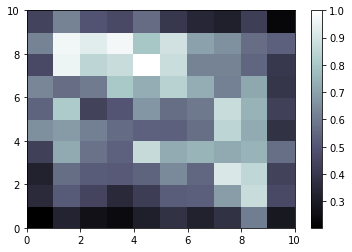

In [ ]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T) # Distance map as background reference
colorbar()
show()

From the above distance map we can measure the distance between the weight vector and winner neuron nd we can say on observing the above map that darker the color is less is the distance, and lighter the color more is the distance.

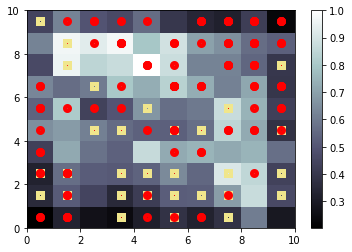

In [ ]:
y = Y
bone()

pcolor(som.distance_map().T)

colorbar()
markers = ['o', 's','m','M'] 

colors = ['r','khaki','mistyrose','hotpink']

for i, x in enumerate(X):

    w = som.winner(x)

    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],  markeredgecolor = colors[y[i]],  markerfacecolor = 'None',  markersize = 4,  markeredgewidth = 5)

show()

**CONCLUSION**

* From the Basic Explanatory Analysis we observe that there are 303 rows and 14 columns,and we observe that all the values are the combination of float and integer datatype.
* As the algorithmn steps ,first here we initialize weights ,then compute the eucledian distance ,we then consider the minimum weight and that partcular neuron is the winner ,then the radius of neighborhood is fixed by default the value is 1 ,and then we update the weights. Here,the hyperparameters are alpha(learning parameter),radius size,sigma and iterations.
*we observe that the size is 10*10 that is 100 neurons ,with sigma 1 and other hyperparameter value.
* From the Eucledian distance color bar plot we can observe that darker the colour smaller the distance and lighter the colour is larger the distance.
* As the grid hyperparameter is increased ,it can be observed that we can observe a lot of clusters but a very tight packing complex graph. we can also observe the neurons overlapping because the distance is calculated not really on any particular bases and hence neurons may overlap this is considered as one of the diadvantages of the algorithm.
*   We observe from the final output that we two clusters one of the class 0 i.e. assymptotic and class 1 i.e. atypical angina.




